In [1]:
import random
import numpy as np 
from functools import reduce 
#import matplotlib.pyplot as plt
from similarity import *
from transformation import *
import tools
import simGen
from copy import deepcopy
import importlib as ip
ip.reload(tools)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user2\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<module 'tools' from 'c:\\Users\\user2\\Documents\\Stage\\Code\\simTree\\tools.py'>

In [2]:
import main
import log
log.init()

In [ ]:
param_algo = {
    "population_size" : N,
    "nb_generation"   : 15,
    "proba_selection" : 0.4,
    "proba_crossover" : 0.25,
    "proba_mutation"  : 0.3,
    "size_regularisation" : 0.3,
    "negative_sampling_regularisation" : 0.8,

    "top_k" : 15,
    "threshold" : 0.95
    
}

param_data = {
    "tree_max_depth" : 10,
    "similarity_functions" : similarity_functions(),
    "transformation_functions" : transformation_functions(),
    "values" : value_release_date,
    "negatives_values" : negative_dataset
}

In [4]:
N = 1000
isbn_dataset = tools.generate_dataset(db_prop="isbn",wk_prop="P957",size=N)
train,test = tools.train_test_datasets(isbn_dataset, size_train=100)
res = main.genetic_algo(train,nb_positives=100,db_wk_names=("isbn","P957"),negative_sampling=True, plot_img_path="")



ValueError: too many values to unpack (expected 2)

Best sim tree score
0.6957616345949957 ['cos_similarity', ['remove_whitespace', '0-385-60800-4'], ['stem', '1-56849-673-7']]
0.6957616345949957 ['cos_similarity', ['remove_whitespace', '0-385-60800-4'], ['strip_whitespace', '1-56849-673-7']]
0.6957616345949957 ['cos_similarity', ['remove_whitespace', '0-385-60800-4'], ['strip_whitespace', '1-56849-673-7']]
0.6957616345949957 ['cos_similarity', ['stem', '0-385-60800-4'], ['stem', '1-56849-673-7']]
0.6957616345949957 ['cos_similarity', ['stem', '0-385-60800-4'], ['strip_whitespace', '1-56849-673-7']]

Best sim tree similarity
0.8842511655011652 ['jaccard_similarity', ['split_alphanum', ['remove_stopwords', ['lowercase', ['flatten', '0-385-60800-4']]]], ['split_alphanum', ['lowercase', ['remove_whitespace', ['stem', '1-56849-673-7']]]]]
0.8682818004435647 ['jaro_similarity', ['flatten', '0-385-60800-4'], ['strip_whitespace', '1-56849-673-7']]
0.8682818004435647 ['jaro_similarity', ['flatten', '0-385-60800-4'], ['strip_whitespace', '1-5684

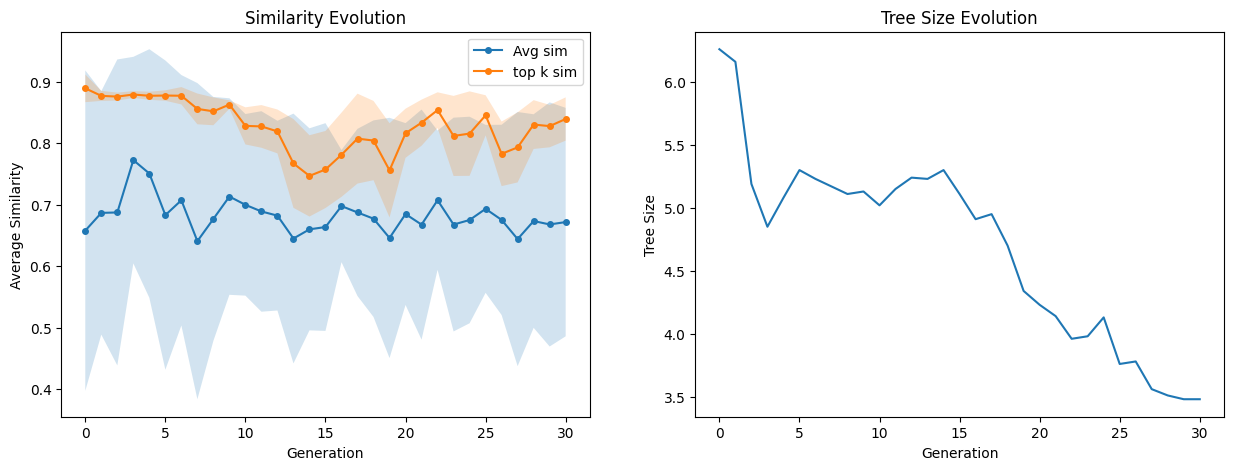

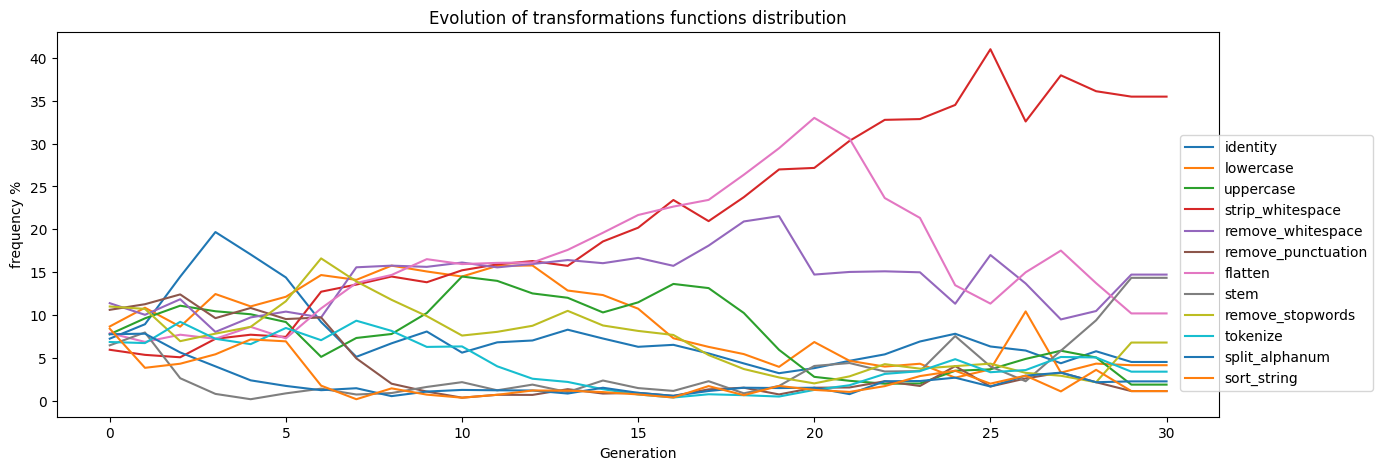

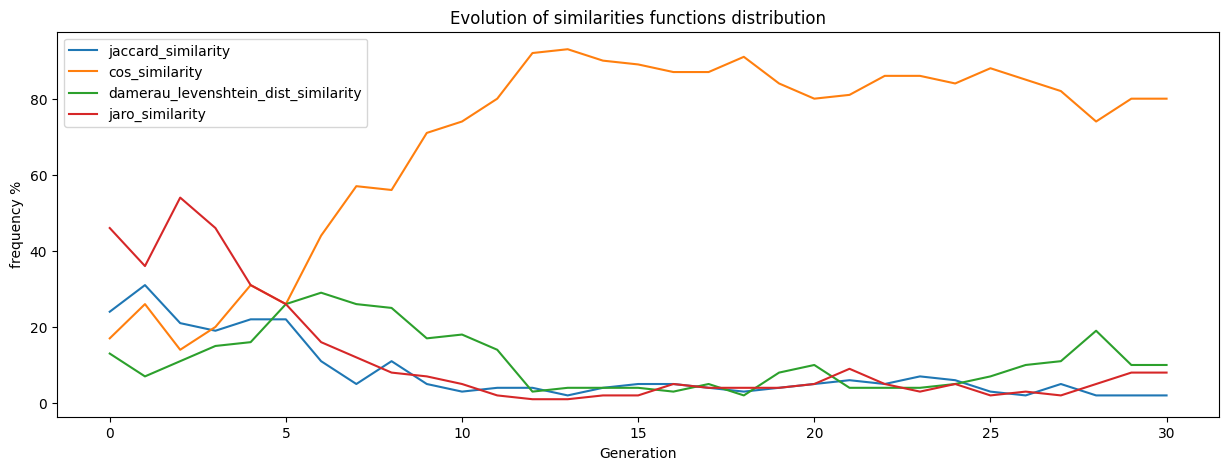

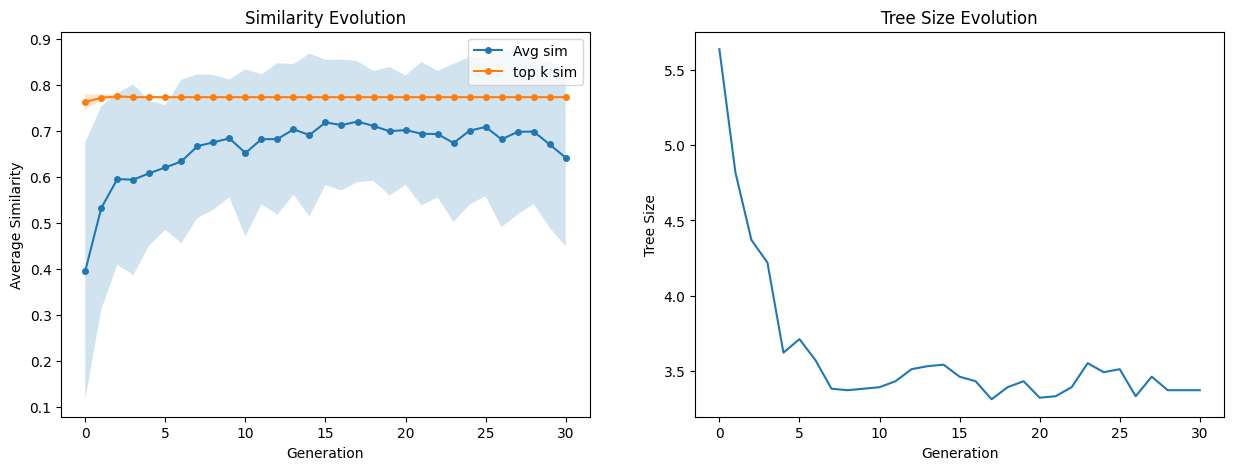

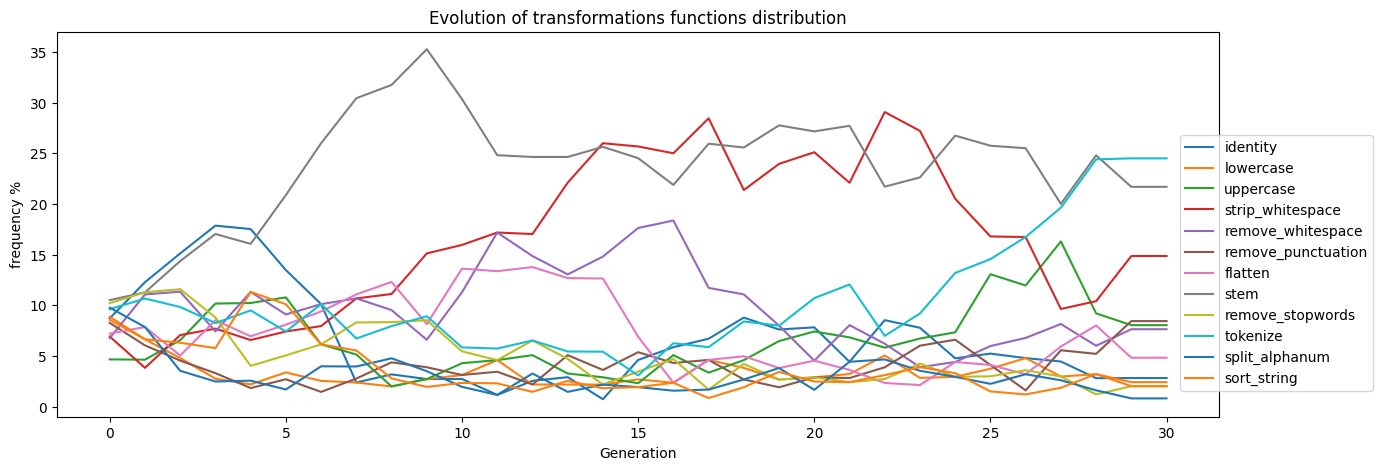

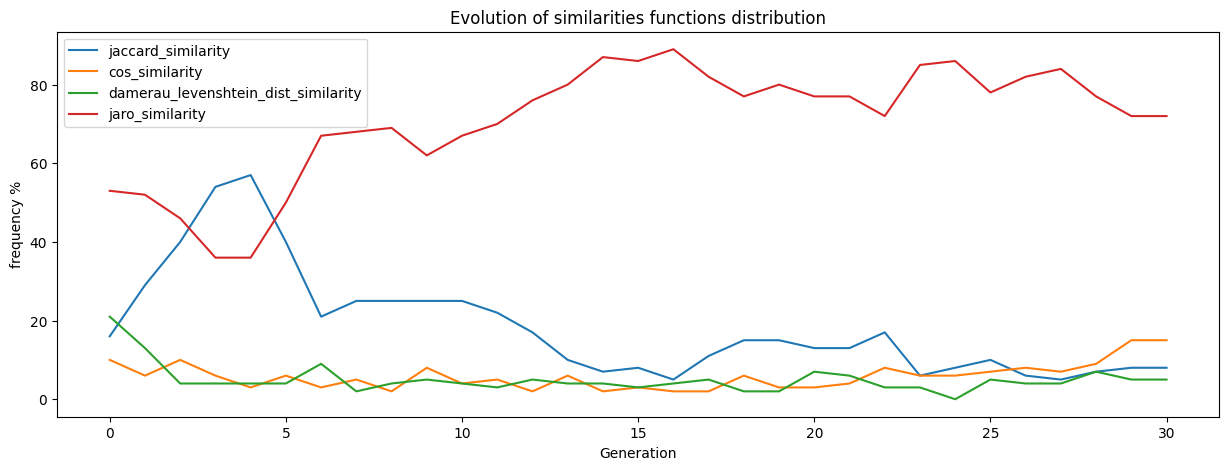

In [3]:
N = 1000
isbn_dataset = tools.generate_dataset(db_prop="isbn",wk_prop="P957",size=N)
sim_isbn, best_trees_isbn = genetic_algo(isbn_dataset,100, True, plot_img_path="img/isbn/100pop")

release_dataset = tools.generate_dataset(db_prop="releaseDate",wk_prop="P577",size=N)
sim_releaseDate, best_trees_releaseDate = genetic_algo(release_dataset,100,True, plot_img_path="img/release_date/100pop")

acc,recall = tools.test_solution(sim_trees=[best_trees_isbn[0],best_trees_releaseDate[0]],dataset=[isbn_dataset,release_dataset],threshold=0.7)
print(f"accuracy = {acc}, recall = {recall}")



In [3]:

new_prefix = "actor" #add prefix actor to every prop without prefix
with open("../datasets/Actor/Actor/YAGO_Actor","r",encoding="UTF-8") as f:
    with open("./../datasets/Actor/Actor/YAGO_Actor_new",'w',encoding="UTF-8") as w:
        for line in f.read().split("\n"):
            if line:
                entity,prop,value = line.split("\t")
                if ":" not in prop:
                    prop = new_prefix+":"+prop
                w.write(entity+"\t"+prop+"\t"+value+"\n")

            
unique_prefix = set()
with open("../datasets/Actor/Actor/YAGO_Actor_new","r",encoding="UTF-8") as f:
    for line in f.read().split("\n"):
        if line:
            entity,prop,value = line.split("\t")
            prefix,name = prop.split(":")
            unique_prefix.add(prefix)
unique_prefix
#find which prefix do we need to manually modif

prefix_uri = {
    "actor" : "<http://simGen/actor/",
    "skos"  : "<http://www.w3.org/2004/02/skos/core#"}

with open("../datasets/Actor/Actor/YAGO_Actor_new","r",encoding="UTF-8") as f:
    with open("./../datasets/Actor/Actor/YAGO_Actor_TEST",'w',encoding="UTF-8") as w:
        for line in f.read().split("\n"):
            if line:
                entity,prop,value = line.split("\t")
                prefix,name = prop.split(":")
                prefix = prefix_uri[prefix]
                w.write(entity+"\t"+prefix+name+">"+"\t"+value+"\n")

In [3]:
with open("../datasets/Actor/Actor/Actor_result-triples_v2.ttl","r",encoding="UTF-8") as f:
    for line in f.read().split("\n"):
        print(line)
        

@base <http://simGen/actor/> .
@prefix actor: <http://simGen/actor/> .

actor:chow_yun-fat <actor:actedin> "crouching_tiger,_hidden_dragon", "a_better_tomorrow",
    "bulletproof_monk", "the_killer_(1989_film)";
  <skos:preflabel> "chow yun-fat", "周潤發", "zau1 jeon6faat3", "chow, yun-fat";
  <actor:ismarriedto> "candice_yu";
  <actor:haswonprize> "a_better_tomorrow", "city_on_fire_(1987_film)", "all_about_ah-long",
    "hong_kong_1941", "an_autumn's_tale";
  <actor:wasbornonyear> "1955";
  <actor:wasbornondate> "1955-05-18";
  <actor:wasbornin> "lamma_island", "hong_kong" .

actor:michelle_yeoh <actor:actedin> "crouching_tiger,_hidden_dragon", "tomorrow_never_dies";
  <skos:preflabel> "michelle yeoh", "楊紫瓊", "杨紫琼", "yáng zǐqióng", "joeng4 zi2-king4",
    "yeoh, michelle";
  <actor:ismarriedto> "dickson_poon";
  <actor:wasbornonyear> "1962";
  <actor:wasbornondate> "1962-08-06";
  <actor:wasbornin> "ipoh", "perak", "malaysia" .

actor:zhang_ziyi <actor:actedin> "crouching_tiger,_hidden_d

In [6]:
a = {}
prop = ["toto","lala"]
a["l"] = 2
if "lala" in str(prop):
    print("True")

True


In [1]:
import main

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user2\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Best sim tree score
0.20180999969617716 ['cos_similarity', ['stem', '2002-09-20'], ['remove_stopwords', '2009-06-22T00:00:00Z']]
0.20180999969617716 ['cos_similarity', ['stem', '2002-09-20'], ['strip_whitespace', '2009-06-22T00:00:00Z']]
0.20180999969617716 ['cos_similarity', ['remove_whitespace', '2002-09-20'], ['strip_whitespace', '2009-06-22T00:00:00Z']]
0.20180999969617716 ['cos_similarity', ['remove_whitespace', '2002-09-20'], ['remove_stopwords', '2009-06-22T00:00:00Z']]
0.20180999969617716 ['cos_similarity', ['stem', '2002-09-20'], ['stem', '2009-06-22T00:00:00Z']]

Best sim tree similarity
0.7779126984126985 ['jaro_similarity', ['stem', '2002-09-20'], ['tokenize', '2009-06-22T00:00:00Z']]
0.7779126984126985 ['jaro_similarity', ['stem', '2002-09-20'], ['stem', '2009-06-22T00:00:00Z']]
0.7779126984126985 ['jaro_similarity', ['stem', '2002-09-20'], ['uppercase', ['stem', '2009-06-22T00:00:00Z']]]
0.7779126984126985 ['jaro_similarity', ['uppercase', '2002-09-20'], ['stem', '2009-06

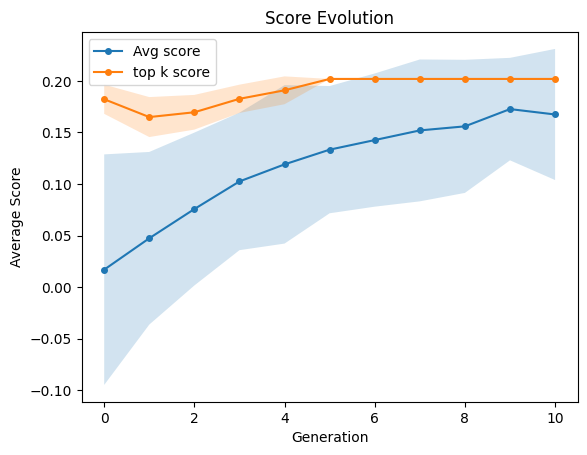

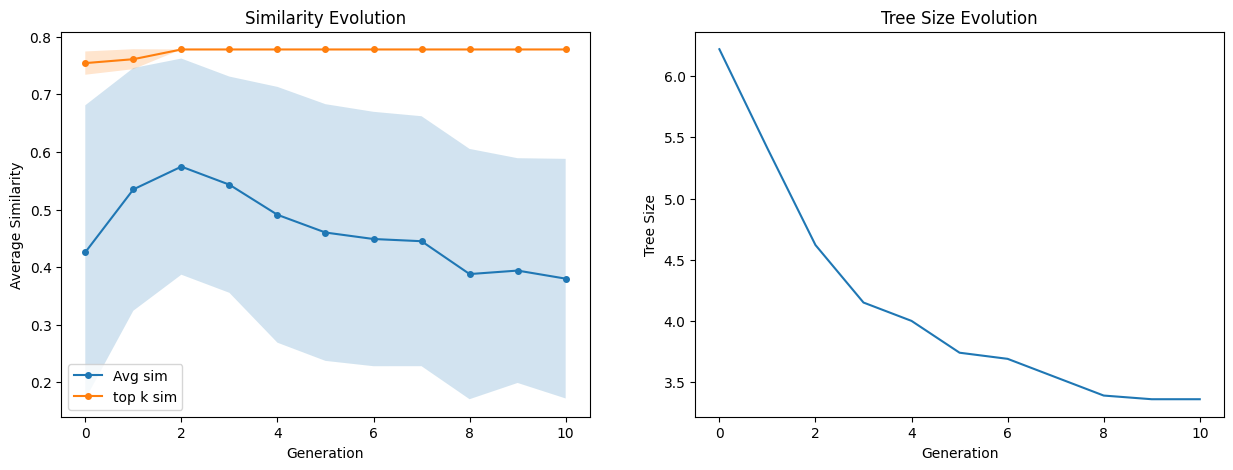

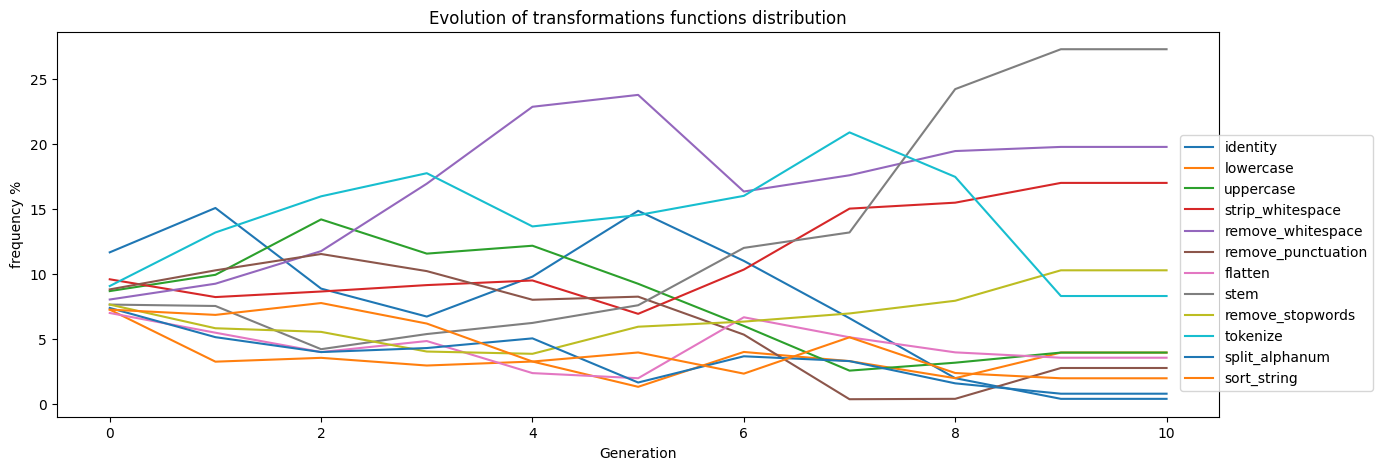

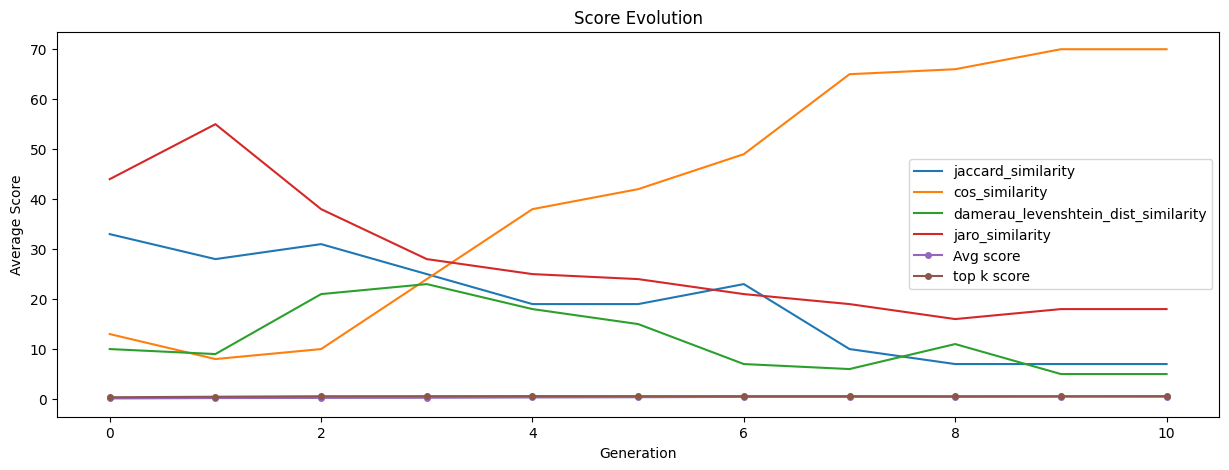

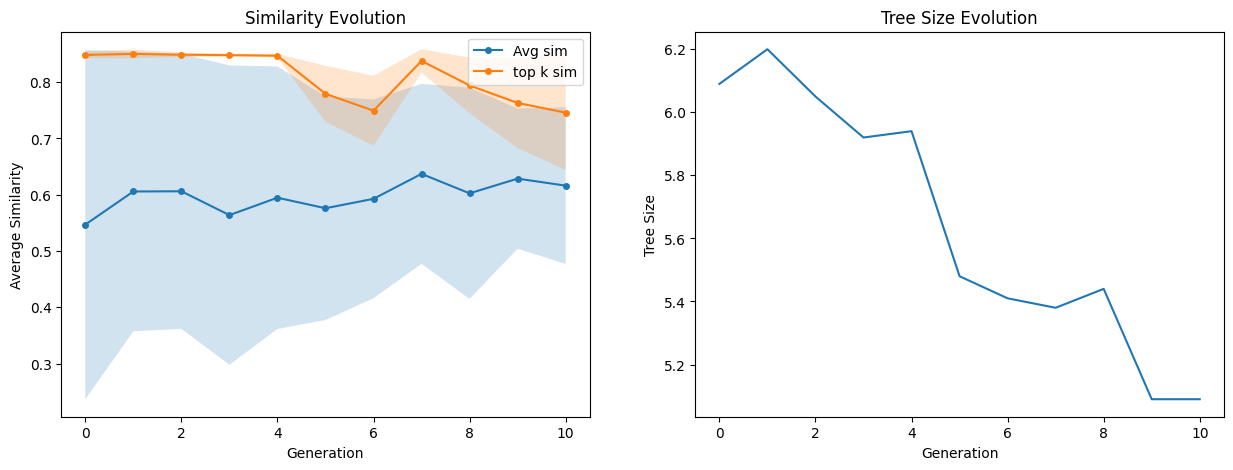

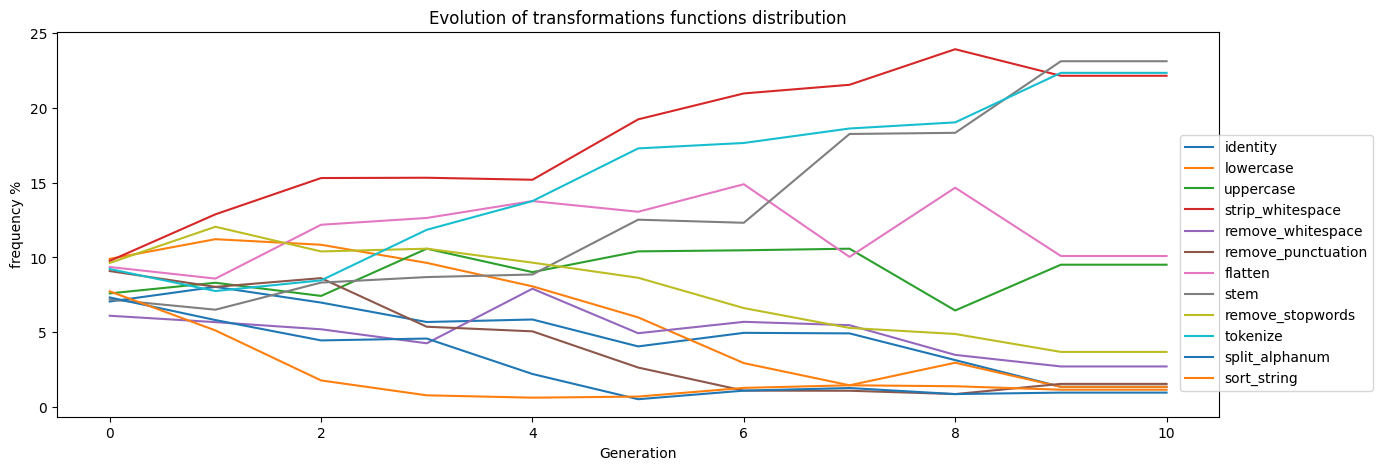

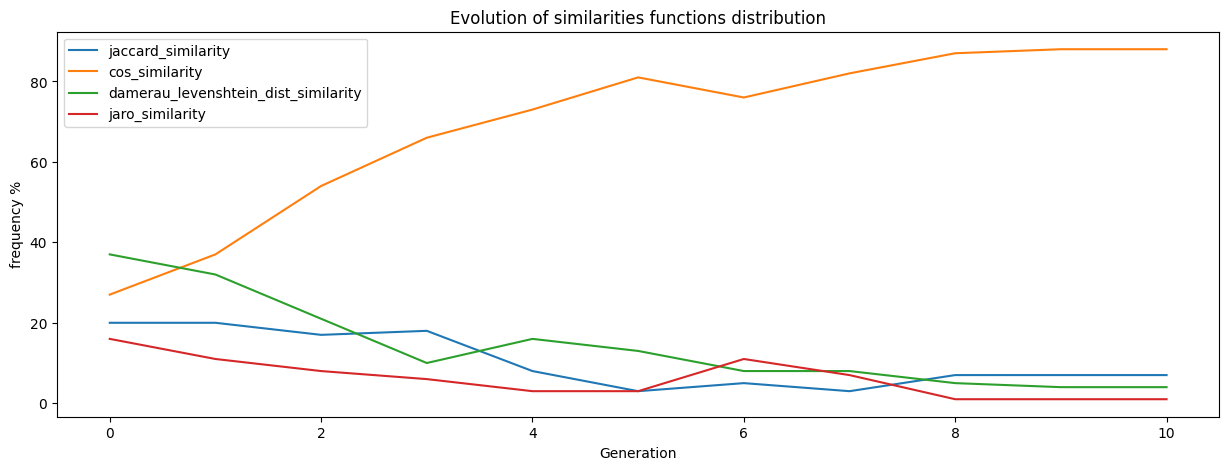

In [2]:
main.run_simGen("./data/keys.txt")